In [ ]:
 Assignment 3

import numpy as np

# Define the perceptron class
class Perceptron:
    def __init__(self, input_size):
        self.weights = np.random.randn(input_size)
        self.bias = np.random.randn()

    # Define the activation function
    def activate(self, x):
        return 1 if x >= 0 else 0

    # Define the prediction function
    def predict(self, inputs):
        summation = np.dot(inputs, self.weights) + self.bias
        return self.activate(summation)

# Function to get ASCII values from user input
def get_input_ascii():
    user_input = input("Enter a number in ASCII values (comma-separated): ")
    ascii_values = [int(val.strip()) for val in user_input.split(',')]
    return ascii_values

# Initialize the perceptron with input size
perceptron = Perceptron(input_size=3)  # Adjusted input size to match input from user

# Training data: ASCII representation of even and odd numbers
training_data = {
    'even': [[48, 51, 54], 0],  # ASCII for even numbers 0, 2, 4
    'odd': [[49, 50, 53], 1]    # ASCII for odd numbers 1, 3, 5
}

# Training the perceptron
epochs = 1000
learning_rate = 0.1

for epoch in range(epochs):
    for data in training_data.values():
        inputs, target = data
        prediction = perceptron.predict(inputs)
        error = target - prediction
        perceptron.weights += learning_rate * error * np.array(inputs)
        perceptron.bias += learning_rate * error

# Test the perceptron
while True:
    user_input = get_input_ascii()
    prediction = perceptron.predict(user_input)
    if prediction == 1:
        print("The number is odd.")
    else:
        print("The number is even.")
    choice = input("Do you want to test another number? (yes/no): ").lower()
    if choice != 'yes':
        break



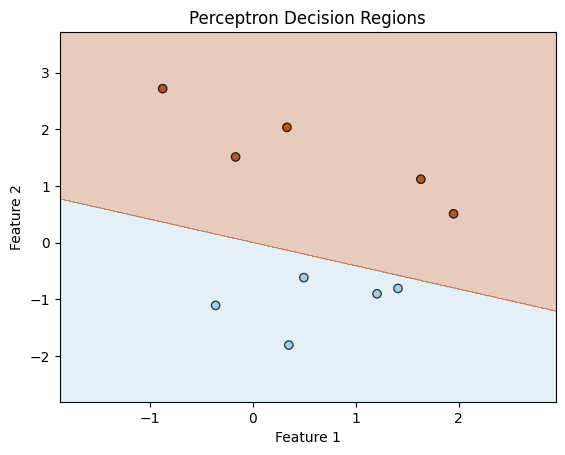

In [5]:
 # Assignment 4
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.datasets import make_classification 
from sklearn.linear_model import Perceptron 
 
# Generate synthetic data for demonstration 
X, y = make_classification(n_samples=10, n_features=2, n_informative=2, 
n_redundant=0, n_clusters_per_class=1, random_state=42) 
 
# Create a perceptron model 
perceptron = Perceptron(max_iter=10, random_state=2) 
 
# Train the perceptron model 
perceptron.fit(X, y) 
 
# Plot the decision regions 
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1 
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1 
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, 
y_max, 0.01)) 
Z = perceptron.predict(np.c_[xx.ravel(), yy.ravel()]) 
Z = Z.reshape(xx.shape) 
 
# Plot the training points 
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired, edgecolors='k') 
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.Paired) 
 
# Set plot labels and title 
plt.xlabel('Feature 1') 
plt.ylabel('Feature 2') 
plt.title('Perceptron Decision Regions') 
 
# Show the plot 
plt.show()

In [1]:
# Assignment 5 
import numpy as np
class BAM:
    def __init__(self,input_size,output_size):
        self.weights = np.zeros((input_size,output_size))

    def train(self,input_pattern,output_pattern):
        for i in range(input_pattern.shape[0]):
            x = input_pattern[i]
            y = output_pattern[i]
            self.weights += np.outer(x,y) 

    def recall_input(self,output_pattern):
        return np.dot(output_pattern , self.weights)

    def recall_output(self,input_pattern):
        return np.dot(input_pattern , self.weights)

input_pattern = np.array([[1,-1],[-1,1]])
output_pattern = np.array([[-1,1],[1,-1]])
bam.train(input_pattern , output_pattern)

input_size =len(input_pattern[1])   #or simply input_size =2
output_size =len(output_pattern[1]) #or simply output_size =2
bam = BAM(input_size,output_size)

input_recall = bam.recall_input(output_pattern)
print("Input Recalled:",input_recall )
print("From Output :",output_pattern)

output_recalled = bam.recall_output(input_pattern)
print("Input:",input_pattern)
print("Output Recalled:",output_recalled)


NameError: name 'bam' is not defined

In [1]:
# Assignment 6

import numpy as np

class NeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size):
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        
        # Initialize weights and biases
        self.weights_input_hidden = np.random.randn(self.input_size, self.hidden_size)
        self.bias_input_hidden = np.random.randn(1, self.hidden_size)
        self.weights_hidden_output = np.random.randn(self.hidden_size, self.output_size)
        self.bias_hidden_output = np.random.randn(1, self.output_size)
        
    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))
    
    def sigmoid_derivative(self, x):
        return x * (1 - x)
    
    def forward_propagation(self, X):
        self.hidden_input = np.dot(X, self.weights_input_hidden) + self.bias_input_hidden
        self.hidden_output = self.sigmoid(self.hidden_input)
        
        self.output = np.dot(self.hidden_output, self.weights_hidden_output) + self.bias_hidden_output
        output = self.sigmoid(self.output)
        return output
    
    def backward_propagation(self, X, y, output):
        error = y - output
        
        # Compute gradients
        d_output = error * self.sigmoid_derivative(output)
        
        error_hidden = d_output.dot(self.weights_hidden_output.T)
        d_hidden = error_hidden * self.sigmoid_derivative(self.hidden_output)
        
        # Update weights and biases
        self.weights_hidden_output += self.hidden_output.T.dot(d_output)
        self.bias_hidden_output += np.sum(d_output, axis=0, keepdims=True)
        self.weights_input_hidden += X.T.dot(d_hidden)
        self.bias_input_hidden += np.sum(d_hidden, axis=0, keepdims=True)
        
    def train(self, X, y, epochs):
        for epoch in range(epochs):
            # Forward propagation
            output = self.forward_propagation(X)
            
            # Backward propagation
            self.backward_propagation(X, y, output)
            
            # Print loss
            if epoch % 100 == 0:
                loss = np.mean(np.square(y - output))
                print(f'Epoch {epoch}, Loss: {loss:.4f}')
                
# Example usage
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([[0], [1], [1], [0]])

# Initialize neural network
input_size = 2
hidden_size = 4
output_size = 1
nn = NeuralNetwork(input_size, hidden_size, output_size)

# Train the neural network
nn.train(X, y, epochs=1000)

# Test the neural network
print("Prediction after Training:")
print(nn.forward_propagation(X))


Epoch 0, Loss: 0.2829
Epoch 100, Loss: 0.2479
Epoch 200, Loss: 0.2035
Epoch 300, Loss: 0.1139
Epoch 400, Loss: 0.0338
Epoch 500, Loss: 0.0138
Epoch 600, Loss: 0.0078
Epoch 700, Loss: 0.0052
Epoch 800, Loss: 0.0039
Epoch 900, Loss: 0.0031
Test Output:
[[0.04494286]
 [0.95444834]
 [0.94388654]
 [0.05260163]]


In [3]:
# Assignment 7

import numpy as np

class NeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size):
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        
        # Initialize weights and biases
        self.weights_input_hidden = np.random.randn(self.input_size, self.hidden_size)
        self.bias_input_hidden = np.random.randn(1, self.hidden_size)
        self.weights_hidden_output = np.random.randn(self.hidden_size, self.output_size)
        self.bias_hidden_output = np.random.randn(1, self.output_size)
        
    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))
    
    def sigmoid_derivative(self, x):
        return x * (1 - x)
    
    def forward_propagation(self, X):
        self.hidden_input = np.dot(X, self.weights_input_hidden) + self.bias_input_hidden
        self.hidden_output = self.sigmoid(self.hidden_input)
        
        self.output = np.dot(self.hidden_output, self.weights_hidden_output) + self.bias_hidden_output
        output = self.sigmoid(self.output)
        return output
    
    def backward_propagation(self, X, y, output):
        error = y - output
        
        # Compute gradients
        d_output = error * self.sigmoid_derivative(output)
        
        error_hidden = d_output.dot(self.weights_hidden_output.T)
        d_hidden = error_hidden * self.sigmoid_derivative(self.hidden_output)
        
        # Update weights and biases
        self.weights_hidden_output += self.hidden_output.T.dot(d_output)
        self.bias_hidden_output += np.sum(d_output, axis=0, keepdims=True)
        self.weights_input_hidden += X.T.dot(d_hidden)
        self.bias_input_hidden += np.sum(d_hidden, axis=0, keepdims=True)
        
    def train(self, X, y, epochs):
        for epoch in range(epochs):
            # Forward propagation
            output = self.forward_propagation(X)
            
            # Backward propagation
            self.backward_propagation(X, y, output)
            
            # Print loss
            if epoch % 100 == 0:
                loss = np.mean(np.square(y - output))
                print(f'Epoch {epoch}, Loss: {loss:.4f}')
                
# XOR function inputs and outputs
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([[0], [1], [1], [0]])

# Initialize neural network
input_size = 2
hidden_size = 4
output_size = 1
nn = NeuralNetwork(input_size, hidden_size, output_size)

# Train the neural network
nn.train(X, y, epochs=10000)

# Test the neural network
print("\nTest Output:")
print(nn.forward_propagation(X))


Epoch 0, Loss: 0.2639
Epoch 100, Loss: 0.1747
Epoch 200, Loss: 0.0897
Epoch 300, Loss: 0.0302
Epoch 400, Loss: 0.0150
Epoch 500, Loss: 0.0091
Epoch 600, Loss: 0.0063
Epoch 700, Loss: 0.0046
Epoch 800, Loss: 0.0036
Epoch 900, Loss: 0.0029
Epoch 1000, Loss: 0.0024
Epoch 1100, Loss: 0.0020
Epoch 1200, Loss: 0.0018
Epoch 1300, Loss: 0.0015
Epoch 1400, Loss: 0.0014
Epoch 1500, Loss: 0.0012
Epoch 1600, Loss: 0.0011
Epoch 1700, Loss: 0.0010
Epoch 1800, Loss: 0.0009
Epoch 1900, Loss: 0.0008
Epoch 2000, Loss: 0.0008
Epoch 2100, Loss: 0.0007
Epoch 2200, Loss: 0.0007
Epoch 2300, Loss: 0.0006
Epoch 2400, Loss: 0.0006
Epoch 2500, Loss: 0.0006
Epoch 2600, Loss: 0.0005
Epoch 2700, Loss: 0.0005
Epoch 2800, Loss: 0.0005
Epoch 2900, Loss: 0.0005
Epoch 3000, Loss: 0.0004
Epoch 3100, Loss: 0.0004
Epoch 3200, Loss: 0.0004
Epoch 3300, Loss: 0.0004
Epoch 3400, Loss: 0.0004
Epoch 3500, Loss: 0.0004
Epoch 3600, Loss: 0.0003
Epoch 3700, Loss: 0.0003
Epoch 3800, Loss: 0.0003
Epoch 3900, Loss: 0.0003
Epoch 4000, 

In [4]:
# Assignment 8

import numpy as np

class HopfieldNetwork:
    def __init__(self, vector_size):
        self.vector_size = vector_size
        self.weights = np.zeros((vector_size, vector_size))
        
    def train(self, vectors):
        num_vectors = len(vectors)
        for vec in vectors:
            vec = vec.reshape(-1, 1)  # Reshape to column vector
            self.weights += np.dot(vec, vec.T)
        
        # Set diagonal elements to 0
        np.fill_diagonal(self.weights, 0)
        
    def predict(self, input_vec, max_iter=100):
        input_vec = input_vec.reshape(-1, 1)  # Reshape to column vector
        for _ in range(max_iter):
            new_vec = np.sign(np.dot(self.weights, input_vec))
            if np.array_equal(new_vec, input_vec):
                return new_vec.flatten()
            input_vec = new_vec
        print("Max iterations reached, network did not converge.")
        return input_vec.flatten()

# Define the binary vectors
vectors = [
    np.array([1, 0, 1, 0]),
    np.array([0, 1, 0, 1]),
    np.array([1, 1, 1, 0]),
    np.array([0, 0, 1, 1])
]

# Initialize and train the Hopfield Network
vector_size = len(vectors[0])
hopfield_net = HopfieldNetwork(vector_size)
hopfield_net.train(vectors)

# Test the network by recalling the stored vectors
for i, vec in enumerate(vectors):
    recalled_vec = hopfield_net.predict(vec)
    print(f"Original Vector {i+1}: {vec}")
    print(f"Recalled Vector {i+1}: {recalled_vec}")
    print()


Original Vector 1: [1 0 1 0]
Recalled Vector 1: [1. 1. 1. 1.]

Original Vector 2: [0 1 0 1]
Recalled Vector 2: [1. 1. 1. 1.]

Original Vector 3: [1 1 1 0]
Recalled Vector 3: [1. 1. 1. 1.]

Original Vector 4: [0 0 1 1]
Recalled Vector 4: [1. 1. 1. 1.]



In [2]:
! pip install tensorflow


INFO: pip is looking at multiple versions of tensorflow to determine which version is compatible with other requirements. This could take a while.
   ---------------------------------------- 0.0/276.5 MB ? eta -:--:--
   ---------------------------------------- 0.1/276.5 MB 2.4 MB/s eta 0:01:56
   ---------------------------------------- 0.3/276.5 MB 3.1 MB/s eta 0:01:31
   ---------------------------------------- 0.4/276.5 MB 3.1 MB/s eta 0:01:31
   ---------------------------------------- 0.6/276.5 MB 3.5 MB/s eta 0:01:20
   ---------------------------------------- 0.8/276.5 MB 3.5 MB/s eta 0:01:20
   ---------------------------------------- 0.9/276.5 MB 3.3 MB/s eta 0:01:23
   ---------------------------------------- 1.1/276.5 MB 3.4 MB/s eta 0:01:21
   ---------------------------------------- 1.4/276.5 MB 3.6 MB/s eta 0:01:18
   ---------------------------------------- 1.6/276.5 MB 3.6 MB/s eta 0:01:17
   ---------------------------------------- 1.8/276.5 MB 3.6 MB/s eta 0:01:17
  

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
selenium 4.17.2 requires typing_extensions>=4.9.0, but you have typing-extensions 4.5.0 which is incompatible.


In [3]:
# Assignment no. 9

import tensorflow as tf
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load and preprocess data
iris = load_iris()
X, y = iris.data, iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define neural network model architecture
neural_network_model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(4,)),
    tf.keras.layers.Dense(3, activation='softmax')
])

# Compile the neural network model
neural_network_model.compile(optimizer='adam',
                             loss='sparse_categorical_crossentropy',
                             metrics=['accuracy'])

# Train the neural network model
neural_network_model.fit(X_train_scaled, y_train, epochs=50, validation_split=0.2)

# Evaluate the neural network model
test_loss_nn, test_acc_nn = neural_network_model.evaluate(X_test_scaled, y_test)
print('Neural Network Test accuracy:', test_acc_nn)

# Define logistic regression model
logistic_model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation='sigmoid', input_shape=(4,))
])

# Compile the logistic regression model
logistic_model.compile(optimizer='adam',
                       loss='binary_crossentropy',
                       metrics=['accuracy'])

# Train the logistic regression model
logistic_model.fit(X_train_scaled, y_train, epochs=50, validation_split=0.2)

# Evaluate the logistic regression model
test_loss_lr, test_acc_lr = logistic_model.evaluate(X_test_scaled, y_test)
print('Logistic Regression Test accuracy:', test_acc_lr)


Epoch 1/50
3/3 [==============================] - 2s 232ms/step - loss: 1.2368 - accuracy: 0.1354 - val_loss: 1.1236 - val_accuracy: 0.3750
Epoch 2/50
3/3 [==============================] - 0s 40ms/step - loss: 1.1794 - accuracy: 0.2188 - val_loss: 1.0744 - val_accuracy: 0.4583
Epoch 3/50
3/3 [==============================] - 0s 39ms/step - loss: 1.1274 - accuracy: 0.2604 - val_loss: 1.0273 - val_accuracy: 0.5417
Epoch 4/50
3/3 [==============================] - 0s 43ms/step - loss: 1.0756 - accuracy: 0.3333 - val_loss: 0.9829 - val_accuracy: 0.5833
Epoch 5/50
3/3 [==============================] - 0s 40ms/step - loss: 1.0276 - accuracy: 0.3958 - val_loss: 0.9415 - val_accuracy: 0.6667
Epoch 6/50
3/3 [==============================] - 0s 41ms/step - loss: 0.9815 - accuracy: 0.4688 - val_loss: 0.9029 - val_accuracy: 0.7500
Epoch 7/50
3/3 [==============================] - 0s 39ms/step - loss: 0.9407 - accuracy: 0.5625 - val_loss: 0.8666 - val_accuracy: 0.8750
Epoch 8/50
3/3 [==========

In [4]:
! pip install torchvision

   ---------------------------------------- 0.0/1.2 MB ? eta -:--:--
   - -------------------------------------- 0.0/1.2 MB ? eta -:--:--
   ------- -------------------------------- 0.2/1.2 MB 2.8 MB/s eta 0:00:01
   ------- -------------------------------- 0.2/1.2 MB 2.8 MB/s eta 0:00:01
   ------- -------------------------------- 0.2/1.2 MB 2.8 MB/s eta 0:00:01
   -------------- ------------------------- 0.4/1.2 MB 1.9 MB/s eta 0:00:01
   ----------------- ---------------------- 0.5/1.2 MB 1.9 MB/s eta 0:00:01
   ----------------- ---------------------- 0.5/1.2 MB 1.9 MB/s eta 0:00:01
   --------------------- ------------------ 0.6/1.2 MB 1.7 MB/s eta 0:00:01
   -------------------------- ------------- 0.8/1.2 MB 1.8 MB/s eta 0:00:01
   ------------------------------- -------- 0.9/1.2 MB 2.0 MB/s eta 0:00:01
   ----------------------------------- ---- 1.0/1.2 MB 2.0 MB/s eta 0:00:01
   ---------------------------------------  1.2/1.2 MB 2.1 MB/s eta 0:00:01
   -----------------------

In [5]:
# Assignment no. 10

import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms

import tensorflow as tf
from tensorflow import keras

# PyTorch
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

train_dataset = datasets.MNIST('./data', train=True, download=True, transform=transform)
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=64, shuffle=True)

test_dataset = datasets.MNIST('./data', train=False, download=True, transform=transform)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=64, shuffle=False)

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(28*28, 512)
        self.fc2 = nn.Linear(512, 10)

    def forward(self, x):
        x = x.view(-1, 28*28)
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

model_pytorch = Net()

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model_pytorch.parameters(), lr=0.01, momentum=0.9)

# Training loop for PyTorch
for epoch in range(5):
    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data
        optimizer.zero_grad()
        outputs = model_pytorch(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        if i % 100 == 99:
            print(f"[{epoch + 1}, {i + 1}] loss: {running_loss / 100:.3f}")
            running_loss = 0.0

# Evaluation for PyTorch
correct = 0
total = 0
with torch.no_grad():
    for data in test_loader:
        images, labels = data
        outputs = model_pytorch(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the PyTorch network on the 10000 test images: {100 * correct / total}%')


# Keras and TensorFlow
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
x_train = x_train / 255.0
x_test = x_test / 255.0

model_keras = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

model_keras.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Training for Keras
model_keras.fit(x_train, y_train, epochs=5, batch_size=64, validation_data=(x_test, y_test))

# Evaluation for Keras
test_loss, test_acc = model_keras.evaluate(x_test, y_test)
print(f'Test accuracy of the Keras model: {test_acc}')


100%|███████████████████████████████████████████████████████████████████| 9912422/9912422 [00:05<00:00, 1715499.54it/s]


Extracting ./data\MNIST\raw\train-images-idx3-ubyte.gz to ./data\MNIST\raw



100%|██████████████████████████████████████████████████████████████████████| 28881/28881 [00:00<00:00, 14825075.73it/s]


Extracting ./data\MNIST\raw\train-labels-idx1-ubyte.gz to ./data\MNIST\raw



100%|███████████████████████████████████████████████████████████████████| 1648877/1648877 [00:00<00:00, 1943215.79it/s]


Extracting ./data\MNIST\raw\t10k-images-idx3-ubyte.gz to ./data\MNIST\raw



100%|██████████████████████████████████████████████████████████████████████████████████████| 4542/4542 [00:00<?, ?it/s]


Extracting ./data\MNIST\raw\t10k-labels-idx1-ubyte.gz to ./data\MNIST\raw

[1, 100] loss: 0.878
[1, 200] loss: 0.412
[1, 300] loss: 0.355
[1, 400] loss: 0.318
[1, 500] loss: 0.292
[1, 600] loss: 0.258
[1, 700] loss: 0.266
[1, 800] loss: 0.224
[1, 900] loss: 0.224
[2, 100] loss: 0.175
[2, 200] loss: 0.193
[2, 300] loss: 0.176
[2, 400] loss: 0.183
[2, 500] loss: 0.167
[2, 600] loss: 0.156
[2, 700] loss: 0.139
[2, 800] loss: 0.141
[2, 900] loss: 0.140
[3, 100] loss: 0.129
[3, 200] loss: 0.113
[3, 300] loss: 0.109
[3, 400] loss: 0.111
[3, 500] loss: 0.114
[3, 600] loss: 0.121
[3, 700] loss: 0.103
[3, 800] loss: 0.109
[3, 900] loss: 0.112
[4, 100] loss: 0.097
[4, 200] loss: 0.096
[4, 300] loss: 0.084
[4, 400] loss: 0.100
[4, 500] loss: 0.089
[4, 600] loss: 0.085
[4, 700] loss: 0.085
[4, 800] loss: 0.088
[4, 900] loss: 0.089
[5, 100] loss: 0.075
[5, 200] loss: 0.079
[5, 300] loss: 0.075
[5, 400] loss: 0.075
[5, 500] loss: 0.072
[5, 600] loss: 0.078
[5, 700] loss: 0.067
[5, 800] loss: 0.058
[